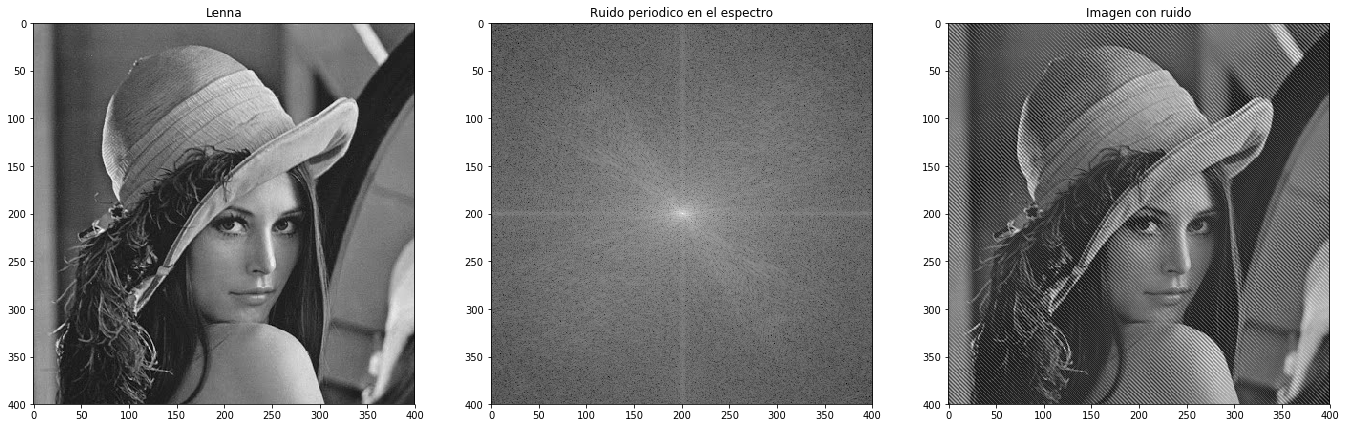

In [134]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import os
import math

def periodic_noise(img):
    n = 1
    base = np.ones((n,n))    
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift[int(3*img.shape[0]/4-n/2):int(3*img.shape[0]/4+n/2), int(img.shape[1]/4-n/2):int(img.shape[1]/4+n/2)] = base*0.3*fshift.max()
    fshift[int(img.shape[0]/4-n/2):int(img.shape[0]/4+n/2), int(3*img.shape[1]/4-n/2):int(3*img.shape[1]/4+n/2)] = base*0.3*fshift.max()

    f_ishift = np.fft.ifftshift(fshift)
    out = np.abs(np.fft.ifft2(f_ishift))
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum, out



image = cv2.imread('Figures/Lenna.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
noisy_spectrum, noisy = periodic_noise(image)

plt.figure(1)
plt.subplots_adjust(left=0.0, right=3, bottom=0.0, top=3)
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Lenna')
plt.subplot(132), plt.imshow(noisy_spectrum, cmap='gray')
plt.title('Ruido periodico en el espectro')
plt.subplot(133), plt.imshow(noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.1. Filtro Notch Ideal </h1>

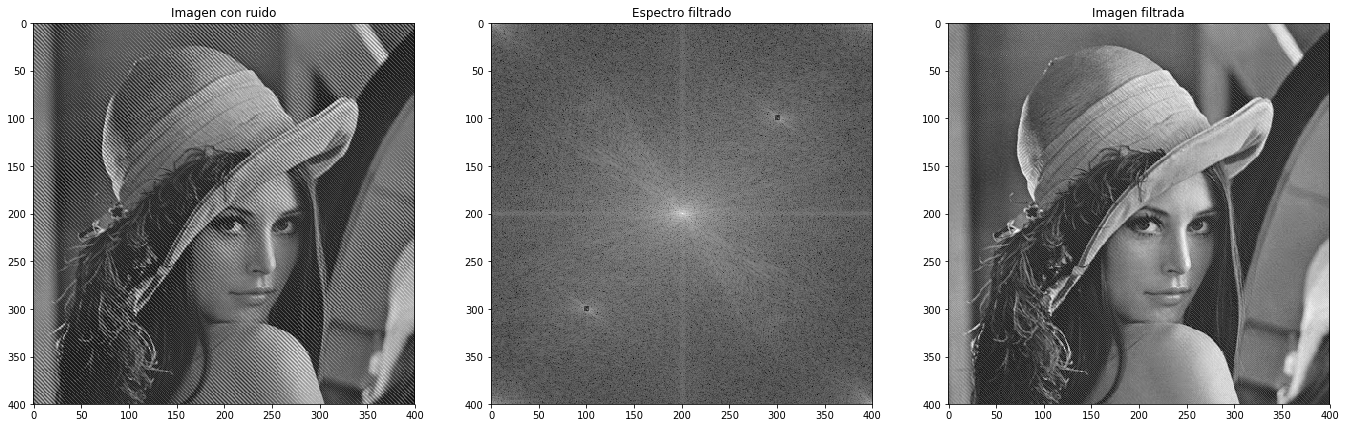

In [229]:
def ideal_notch(img, fo, n, u, v):
    
    base = np.ones((img.shape[0],img.shape[1]))
    base[int(img.shape[0]/2+u-n/2):int(img.shape[0]/2+u+n/2), int(img.shape[1]/2+v-n/2):int(img.shape[1]/2+v+n/2)]=0.01 
    base[int(img.shape[0]/2-u-n/2):int(img.shape[0]/2-u+n/2), int(img.shape[1]/2-v-n/2):int(img.shape[1]/2-v+n/2)]=0.01 
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    magnitude_spectrum = 20*np.log(np.abs(f_flt))
    return magnitude_spectrum, out

spectrum, out = ideal_notch(noisy, 0.1, 6, -imagen.shape[0]/4,imagen.shape[0]/4)
plt.figure(1)
plt.subplots_adjust(left=0.0, right=3, bottom=0.0, top=3)
plt.subplot(131), plt.imshow(noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.subplot(132), plt.imshow(spectrum, cmap='gray')
plt.title('Espectro filtrado')
plt.subplot(133), plt.imshow(out, cmap='gray')
plt.title('Imagen filtrada')
plt.show()

plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.2. Filtro Notch Butterworth </h1>

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


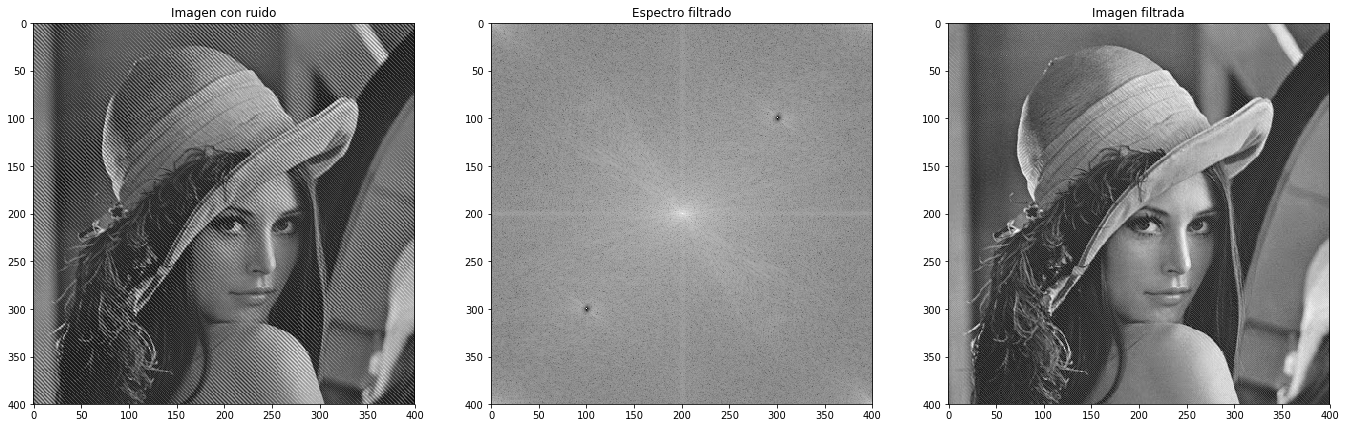

In [151]:
def butterworth_notch(img, fo, n, u, v):
    
    
    D1 = np.matrix([[math.sqrt((x-img.shape[0]/2+u)**2+(y-img.shape[1]/2+v)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    D1 = (D1-D1.min())/(D1.max()-D1.min())
    D2 = np.matrix([[math.sqrt((x-img.shape[0]/2-u)**2+(y-img.shape[1]/2-v)**2) for x in range(img.shape[0])] for y in range(img.shape[1])])
    D2 = (D2-D2.min())/(D2.max()-D2.min())    
    
    base = np.power((np.multiply(D1,D2)/fo**2),(2*n))/(1 + np.power((np.multiply(D1,D2)/fo**2),(2*n)))
    base = (base-base.min())/(base.max()-base.min())
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    magnitude_spectrum = 20*np.log(np.abs(f_flt))
    return magnitude_spectrum, out

spectrum, out = butterworth_notch(noisy, 0.1, 4, -imagen.shape[0]/4,imagen.shape[0]/4)
plt.figure(1)
plt.subplots_adjust(left=0.0, right=3, bottom=0.0, top=3)
plt.subplot(131), plt.imshow(noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.subplot(132), plt.imshow(spectrum, cmap='gray')
plt.title('Espectro filtrado')
plt.subplot(133), plt.imshow(out, cmap='gray')
plt.title('Imagen filtrada')
plt.show()

plt.show()

<h1 style="font-size:180%; color:blue; text-align:left; line-height:45px;"> 2.3. Filtro Notch Gaussiano </h1>

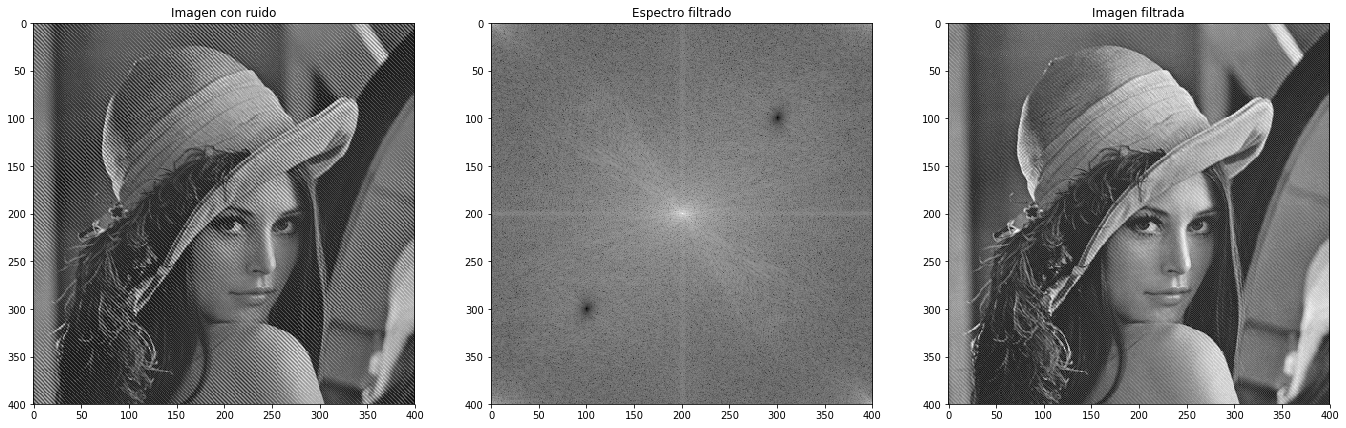

In [228]:
def gaussian_notch(img, fo, n, u, v):
    
    
    D1 = np.matrix([[math.sqrt((x-img.shape[0]/2+u)**2+(y-img.shape[1]/2+v)**2) for x in range(img.shape[0])] for y in range(img.shape[1])]) 
    D1 = (D1-D1.min())/(D1.max()-D1.min())
    D2 = np.matrix([[math.sqrt((x-img.shape[0]/2-u)**2+(y-img.shape[1]/2-v)**2) for x in range(img.shape[0])] for y in range(img.shape[1])])
    D2 = (D2-D2.min())/(D2.max()-D2.min())    
    
    base = 1 - np.exp(-(np.multiply(D1,D2)/fo**2))
    base = (base-base.min())/(base.max()-base.min())
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    f_flt = np.multiply(fshift, base)
    f_ishift = np.fft.ifftshift(f_flt)
    out = np.abs(np.fft.ifft2(f_ishift))
    magnitude_spectrum =  np.multiply(20*np.log(np.abs(fshift)),base)
    return magnitude_spectrum, out

spectrum, out = gaussian_notch(noisy, 0.1, 4, -imagen.shape[0]/4,imagen.shape[0]/4)
plt.figure(1)
plt.subplots_adjust(left=0.0, right=3, bottom=0.0, top=3)
plt.subplot(131), plt.imshow(noisy, cmap='gray')
plt.title('Imagen con ruido')
plt.subplot(132), plt.imshow(spectrum, cmap='gray')
plt.title('Espectro filtrado')
plt.subplot(133), plt.imshow(out, cmap='gray')
plt.title('Imagen filtrada')
plt.show()

plt.show()